In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

In [2]:
# Load the microdissection density data
microdissection_density = pd.read_csv('data/MALDI_IHC/microdissection_densities.csv')

# Load the immuno count data
immuno_counts = pd.read_csv('data/MALDI_IHC/results/immuno_counts_vst.csv')

In [3]:
# Rename the microdissection column to match the gene expression data
microdissection_density = microdissection_density.rename(columns={"microdissection": "Microdissection"})

# Add density to the microdissection_density column names
microdissection_density.columns = [f'{col}_density' if col != 'Microdissection' else col for col in microdissection_density.columns]

# Join the immuno_counts and microdissection_density dataframes on the Microdissection column
immuno_counts_density = immuno_counts.merge(microdissection_density, on='Microdissection')

# Filter the immuno_counts_density to exclude the samples with defects > 0.1
immuno_counts_density = immuno_counts_density[immuno_counts_density["Defects_density"] < 0.1]

# Drop the Defects and Lesion columns
immuno_counts_density = immuno_counts_density.drop(columns=['Defects_density', 'Lesion_density'])

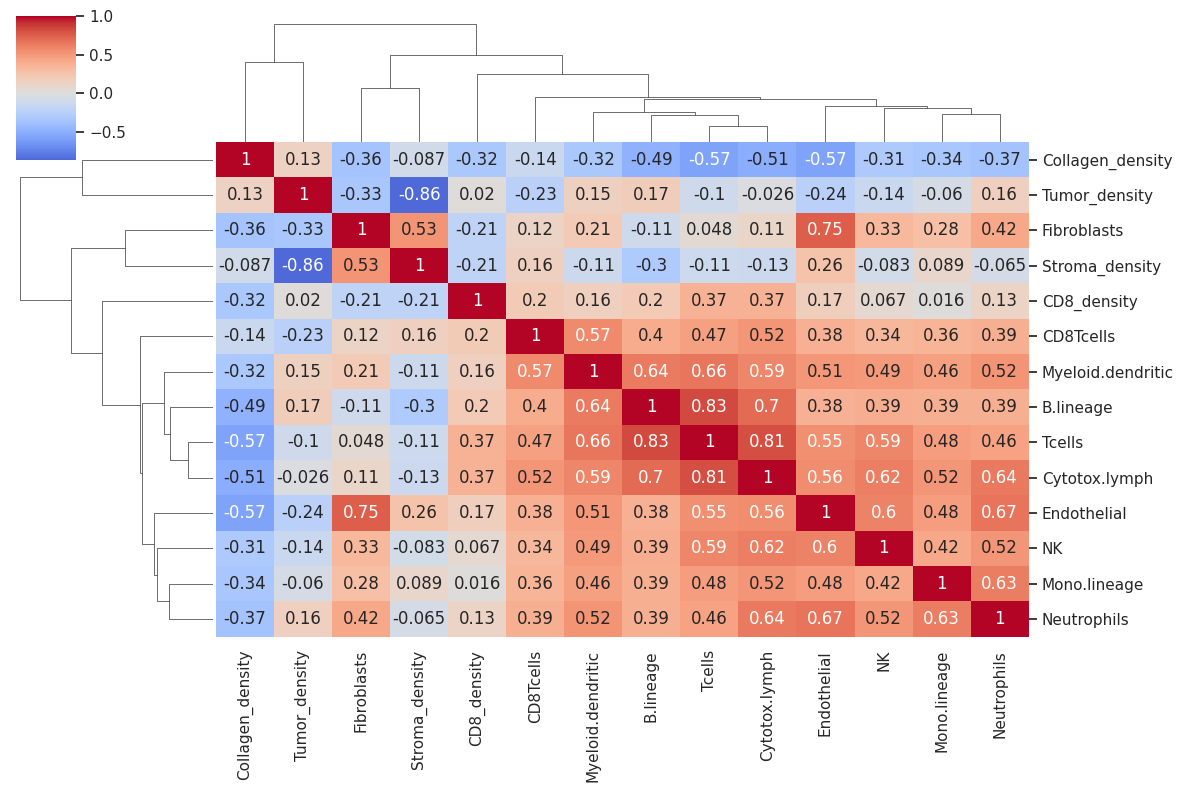

In [4]:
# Find the correlation between all the immuno counts columns and all the microdissection density columns
correlations = immuno_counts_density.iloc[:, 1:].corr()

# plot the clustermap of the correlations
sns.clustermap(correlations, annot=True, cmap='coolwarm', center=0, figsize=(12, 8))
plt.show()